In [ ]:
import statistics as st
import random
sample = [random.randint(1, 100) for x in range(1, 100)]
print(sample)

print('mean: ', st.mean(sample))
print('median: ', st.median(sample))
print('mode: ', st.mode(sample))
print('standard deviation: ', st.stdev(sample))
print('variance: ', st.variance(sample))



In [ ]:
# Binomial probability distribution fuction
from scipy.stats import binom
import matplotlib.pyplot as plt
n = 10 # number of events
p = 0.4 # probability of getting head
r = list(range(n+1)) # number of favourable outcomes
mean, var = binom.stats(n, p)
print("mean and variance: ", mean, var)
dist = list(binom.pmf(x, n, p) for x in r)
plt.plot(r, dist)
plt.show()

In [ ]:
# Poisson probability distribution
from scipy.stats import poisson
import matplotlib.pyplot as plt

sample = [x for x in range(0,6)]
sample = poisson.pmf(3, sample)
plt.plot(sample)
plt.show()

In [ ]:
# Gaussian/Normal probability distribution
from scipy.stats import norm
import numpy as np
mean = 5
std_dev = 50
sample = np.linspace(-100, 100, 1000)
f = norm(mean, std_dev)
dist = f.pdf(sample)
plt.plot(dist)
plt.show()

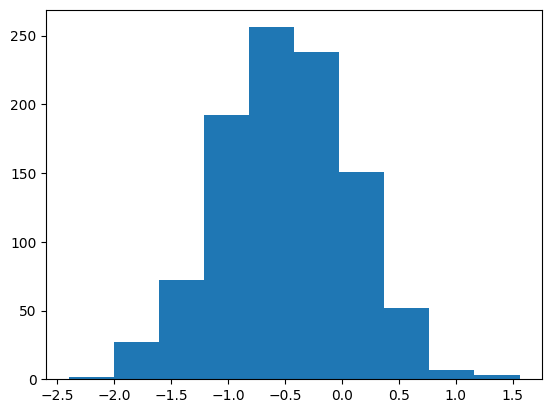

In [52]:
# Central limit theorem
# Thousand sample means with each sample having 100 random values between -10 and 10
import matplotlib.pyplot as plt
data = [np.mean(np.random.randint(-10, 10, 100)) for i in range(1000)]

# Plotting the means that gives the normal distribution
plt.hist(data)
plt.show()


In [54]:
# Confidence interval
import numpy as np 
import scipy.stats as st 
  
# define sample data 
gfg_data = [1, 1, 1, 2, 2, 2, 3, 3, 3, 
            3, 3, 4, 4, 5, 5, 5, 6, 
            7, 8, 10] 
  
# create 99% confidence interval 
st.t.interval(confidence=0.99, 
              df=len(gfg_data)-1, 
              loc=np.mean(gfg_data),  
              scale=st.sem(gfg_data)) 

(2.3481954013214263, 5.4518045986785735)

In [76]:
# One sample t-test / one-tailed t-test
from scipy.stats import ttest_1samp
from random import sample
population_mean = 165
sample_data = sample(range(145, 180), 30)
sample_mean = np.mean(sample_data)

ttest_1samp(a=sample_data, popmean=165)

# Since the p value is more than 0.05, we can reject the null hypothesis


TtestResult(statistic=-1.4193363838131408, pvalue=0.16646110875174477, df=29)

In [82]:
# Two sample t-test / Two tailed t-test
from scipy.stats import ttest_ind
from random import sample
sample_1 = sample(range(140, 184), 30)
sample_2 = sample(range(140, 184), 30)
print(np.var(sample_1), np.var(sample_2))
# ttest_ind(sample_1, sample_2, equal_var=True)
ttest_ind(sample_1, sample_2, equal_var=False)



157.88888888888889 154.27222222222224


TtestResult(statistic=-1.269984318155295, pvalue=0.20916239768961117, df=57.99221552959344)

In [83]:
# Paired t_test
from scipy.stats import ttest_rel
from random import sample
sample_1 = sample(range(135, 170), 30)
sample_2 = sample(range(145, 180), 30)
ttest_rel(sample_1, sample_2)

TtestResult(statistic=-3.8203873135731126, pvalue=0.0006500634386439201, df=29)

In [84]:
# F-Test
# Compare variances of two populations where the groups are taken from equal or not
import numpy as np
import scipy.stats as stats
 
# Create the data for two groups
group1 = np.random.rand(25)
group2 = np.random.rand(20)
 
# Calculate the sample variances
variance1 = np.var(group1, ddof=1)
variance2 = np.var(group2, ddof=1)
 
# Calculate the F-statistic
f_value = variance1 / variance2
 
# Calculate the degrees of freedom
df1 = len(group1) - 1
df2 = len(group2) - 1
 
# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)
 
# Print the results
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("p-value:", p_value)



Degree of freedom 1: 24
Degree of freedom 2: 19
F-statistic: 1.3008773026586795
p-value: 0.7183229669590911


In [85]:
# Anova test
from random import sample
from scipy.stats import f_oneway

# One way anova-test
    # We have to check if the effect of 4 different performace enhancers on an electric vehicle is same or not


sample_1 = sample(range(0,100), 20)
sample_2 = sample(range(0,95), 20)
sample_3 = sample(range(0,120), 20)
sample_4 = sample(range(0,145), 20)
f_oneway(sample_1, sample_2, sample_3, sample_4)





F_onewayResult(statistic=3.607745851211369, pvalue=0.01706368322371624)

In [94]:
# Two way anova-test
# We have to check how 2 factors will affect the response variable


# Importing libraries 
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
import pandas as pd
  
# Create a dataframe 
dataframe = pd.DataFrame({'Fertilizer': np.repeat(['daily', 'weekly'], 15), 
                          'Watering': np.repeat(['daily', 'weekly'], 15), 
                          'height': [14, 16, 15, 15, 16, 13, 12, 11, 
                                     14, 15, 16, 16, 17, 18, 14, 13,  
                                     14, 14, 14, 15, 16, 16, 17, 18, 
                                     14, 13, 14, 14, 14, 15]}) 
# print(dataframe)
    
# Performing two-way ANOVA 
model = ols('height ~ C(Fertilizer) + C(Watering) + C(Fertilizer):C(Watering)', 
            data=dataframe).fit() 
result = sm.stats.anova_lm(model, type=2) 
  
# Print the result 
print(result) 

                             df     sum_sq   mean_sq         F    PR(>F)
C(Fertilizer)               1.0   0.033333  0.033333  0.012069  0.913305
C(Watering)                 1.0   1.421614  1.421614  0.514722  0.479045
C(Fertilizer):C(Watering)   1.0   0.223698  0.223698  0.080994  0.778049
Residual                   28.0  77.333333  2.761905       NaN       NaN


In [95]:
# Z-test

# Sample size > 30
# is to compare the means of the population where the variances are known and 
# the sample sizes are large compared to t-test

# Assumptions
    # Standard deviations and variancs are known
    # Population size should be 10 times as much as the sample size
    # Samples are drawn at random from population
# One sample z-test for mean

from random import sample
from statsmodels.stats.weightstats import ztest

sample_data = sample(range(30, 80), 50)
ztest(sample_data, value=55)

(-0.24253562503633297, 0.8083651559145103)

In [99]:
# Two sample z-test
    # - see if means are equal

from random import sample
from statsmodels.stats.weightstats import ztest

sample_data = sample(range(130, 185), 50)

sample_data_2 = sample(range(130, 185), 50)

ztest(sample_data, sample_data_2, value=0)

(0.38438550187985765, 0.7006927445364217)

In [ ]:
# One sample z-test for proportion


In [100]:
# Chi-Square test

# For categorical data that can be used to check the goodness of fit or test of independence
# Assumptions
    # - the featuers are cateogorical in nature
    # the samples are taken at random
    # Minimum of five observations expected in each group


from scipy.stats import chi2_contingency
 
# defining the table
data = [[207, 282, 241], [234, 242, 232]]
stat, p, dof, expected = chi2_contingency(data)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)') 

p value is 0.1031971404730939
Independent (H0 holds true)
